In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
# Let's plot some images to see what they are
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index]) # used to display an image (2D data as an image).
    plt.xlabel(classes[y[index]])

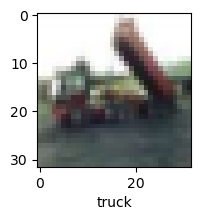

In [8]:
plot_sample(x_train, y_train, 2)

In [10]:
# Normalizing the training data :-
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
#Hence to normalize in 0-->1 range, we need to divide it by 255 

x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
# Build simple artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # to convert the set of all images into a tabular form
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3573 - loss: 1.8070 
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4258 - loss: 1.6200 
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4552 - loss: 1.5410 
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4783 - loss: 1.4807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4959 - loss: 1.4314 


In [14]:
ann.evaluate(x_test,y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4622 - loss: 1.4907


[1.490652322769165, 0.46219998598098755]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step 
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.45      0.52      1000
           1       0.73      0.38      0.49      1000
           2       0.30      0.54      0.38      1000
           3       0.37      0.28      0.32      1000
           4       0.44      0.34      0.38      1000
           5       0.32      0.49      0.39      1000
           6       0.56      0.45      0.50      1000
           7       0.73      0.33      0.45      1000
           8       0.57      0.69      0.62      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [21]:
# Now let us build a convolutional neural network to train our images

cnn = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8033 - loss: 0.5621
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8132 - loss: 0.5284
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8226 - loss: 0.4993
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8315 - loss: 0.4764
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8421 - loss: 0.4451
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8526 - loss: 0.4151
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8594 - loss: 0.3953
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8675 - loss: 0.3713
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8774 - loss: 0.3455
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8822 - loss: 0.3314
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8896 - loss: 0.3068
Epoch 12

In [38]:
# With CNN, at the end 5 epochs, accuracy was at around 97% which is a significant improvement over ANN. CNN's are best for image classification and 
# gives superb accuracy.Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [39]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6591 - loss: 3.6442


[3.6441731452941895, 0.6590999960899353]

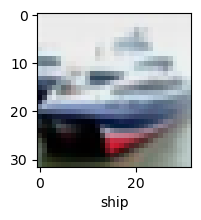

In [40]:
plot_sample(x_test,y_test,1)

In [41]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


array([[9.41582835e-18, 3.63270636e-23, 7.18982543e-17, 1.00000000e+00,
        2.81821650e-19, 4.27568917e-16, 1.38320327e-11, 5.72248496e-24,
        1.40168054e-14, 7.62798367e-20],
       [6.58174486e-07, 1.48484136e-09, 1.68578882e-26, 3.67225153e-35,
        8.03656994e-31, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.99999285e-01, 1.76647749e-24],
       [2.12560417e-06, 4.89551226e-08, 2.25533769e-09, 1.73526714e-05,
        6.56961803e-14, 4.45483460e-14, 7.29600685e-11, 2.32352890e-16,
        9.99978423e-01, 1.98772705e-06],
       [9.99908328e-01, 8.71592382e-11, 3.02733489e-12, 2.24780064e-14,
        1.24609938e-19, 1.29242736e-17, 2.58563287e-15, 9.12865043e-23,
        9.17042489e-05, 6.36404720e-14],
       [3.29306103e-37, 2.28093396e-28, 5.64026763e-04, 4.29273117e-04,
        2.70885509e-03, 6.36958498e-12, 9.96297896e-01, 1.07127281e-21,
        1.25223171e-18, 6.41404288e-21]], dtype=float32)

In [42]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

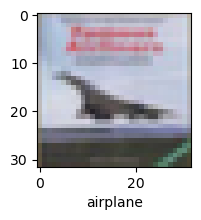

In [44]:
plot_sample(x_test,y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'

In [46]:
classes[y_classes[1]]

'ship'

In [47]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.85      0.72      0.78      1000
           2       0.59      0.51      0.55      1000
           3       0.43      0.54      0.48      1000
           4       0.63      0.59      0.61      1000
           5       0.56      0.53      0.55      1000
           6       0.74      0.70      0.72      1000
           7       0.74      0.67      0.70      1000
           8       0.76      0.81      0.78      1000
           9       0.67      0.80      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

